## Ex 7: Aerobreaking

In [58]:
import matplotlib.pyplot as plt
from space_base import GravBody, Probe
from numpy import sqrt, linspace, pi, cos, sin, exp, outer, size, ones

# Constants
G = 6.67e-11  # Gravitational constant
mars = GravBody(name="Mars", mass=0.64169e24, radius=3389.5e3)  # Earth as an object with mass and radius

We start by taking the equations of motion writes in the previous WE.

In [59]:
def atmosphere(h):
    surfacedens=0.020
    scaleheight=11.1e3
    return surfacedens*exp(-h/scaleheight)

Then, we need to adapt the previous equation by using the 3 dimensions.

In [60]:
def probeqns(_, posvel):
    r = sqrt(posvel[0] ** 2 + posvel[1] ** 2 + posvel[2] ** 2)
    f = -G * mars.mass / r ** 3
    gravity_force = f * posvel[0], f * posvel[1], f * posvel[2]

    cd=1.0
    A=0.01
    v2 = posvel[3] ** 2 + posvel[4] ** 2 + posvel[5] ** 2
    unit_v = posvel[3:6] / sqrt(v2)
    drag_force = -0.5 * cd * A * atmosphere(r - mars.radius) * v2 * unit_v
    axyz = drag_force + gravity_force

    return posvel[3], posvel[4], posvel[5], axyz[0], axyz[1], axyz[2]

Then, we need to compute the semi-major axis of the initial orbit knowing that $r_p+r_a=2*a$, so $a=\frac{r_p + r_a}{2}$

In [61]:
r_p = mars.radius + 100e3
r_a = 47972e3
a_initial = (r_p + r_a) / 2

We will now use the energy equation to compute the initial velocity assuming that on first orbit the energy is conserved.
$$E=\frac{1}{2}mV^2-\frac{GM_{planet}m}{r}=-\frac{GM_{planet}m}{2a}$$
$$V=\sqrt{2GM_{planet}(\frac{1}{r}-\frac{1}{2a})}$$

In [62]:
v = sqrt(2*G*mars.mass*(1/r_a - 1/(2*a_initial)))
v # Initial velocity in m/s

347.84600419637707

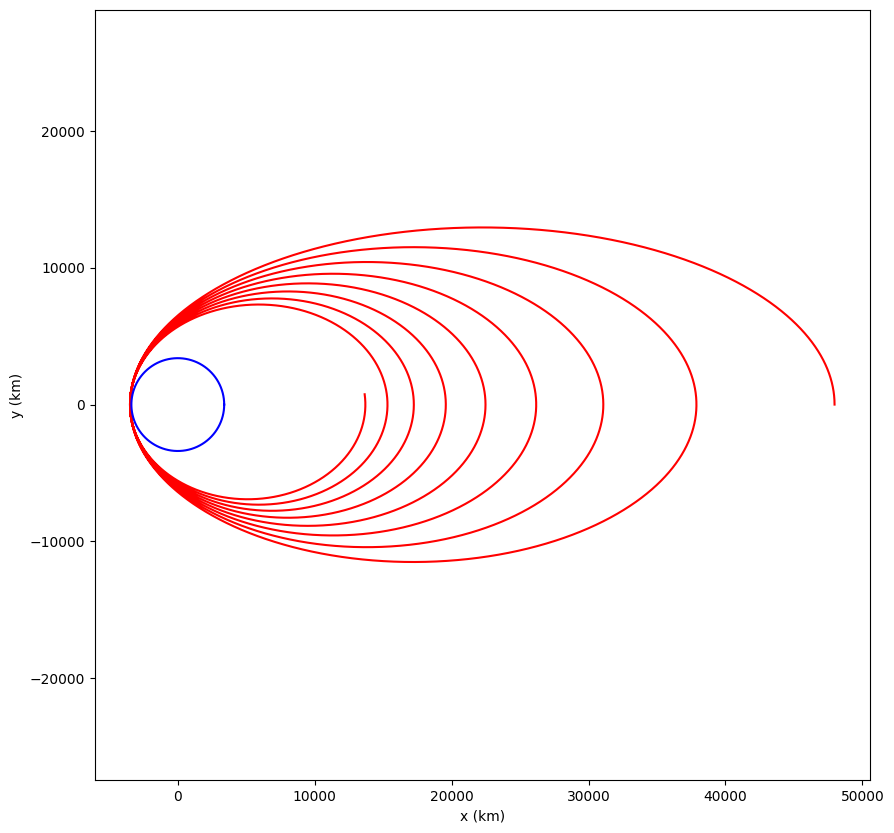

In [63]:
# Initial Conditions
t_final = 3600 * 24 * 5 # determined trajectory time
t_num = t_final # number of steps in trajectory
xyz0 = [r_a*cos(30 * pi / 130), 0, r_a*sin(30 * pi / 130)]  # start position
vxyz0 = [0, v, 0]  # start vertical speed

probe = Probe(probeqns, t_final, t_num, x0=xyz0[0], vx0=vxyz0[0], 
            y0=xyz0[1], vy0=vxyz0[1], z0=xyz0[2], vz0=vxyz0[2], event=mars.radius) # probe as an object
t, posvel = probe.odesolve() # solve the differential equations

# Plotting 2D trajectory in orbit plane
fig = plt.figure(figsize=(10, 10)) # create figure, figsize can be changed as preferred
ax = fig.add_subplot(111)
ax.plot(posvel[:, 0] /(cos(30 * pi / 130) * 1e3), posvel[:, 1] / 1e3, color='red')

# Plotting Mars
uang = linspace(0, 2 * pi, 100)
x = (mars.radius / 1e3) * cos(uang)
y = (mars.radius / 1e3) * sin(uang)
ax.plot(x, y, color='blue')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.axis('equal')
plt.show() # make plot appear

By running the simulation for 5 days we clearly see that the probe is losing energy each time it is close to Mars as the result of drag. Of course, drag parameters like drag coefficient, surface and velocity will change drastically the speed of energy loss and the number of orbit required to slow down but will increase heating.

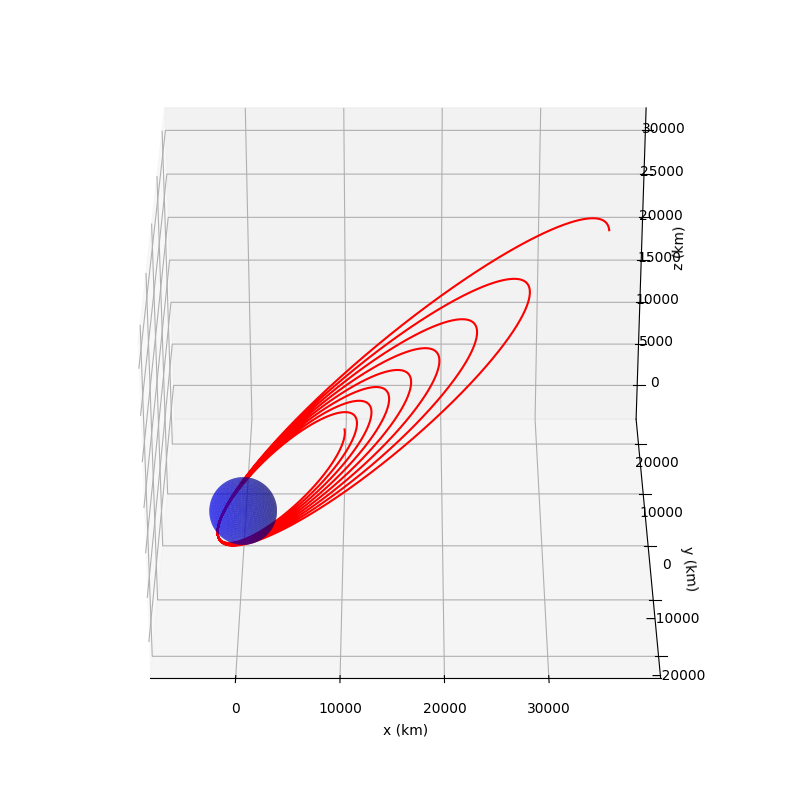

In [64]:
fig = plt.figure(figsize=(15, 10)) # create figure, figsize can be changed as preferred
ax = fig.add_subplot(111, projection='3d')
ax.plot(posvel[:, 0] / 1e3, posvel[:, 1] / 1e3, posvel[:, 2] / 1e3, color='red')

# Plotting Mars
uang = linspace(0, 2 * pi, 100)
vang = linspace(0, pi, 100)
x = mars.radius / 1e3 * outer(cos(uang), sin(vang))
y = mars.radius / 1e3 * outer(sin(uang), sin(vang))
z = mars.radius / 1e3 * outer(ones(size(uang)), cos(vang))
ax.plot_surface(x, y, z, color='blue', alpha=0.5)
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.axis('equal')
ax.azim = -90

plt.show() # make plot appear

With this 3D graph of the orbit we can clearly see the inclination of 30°.

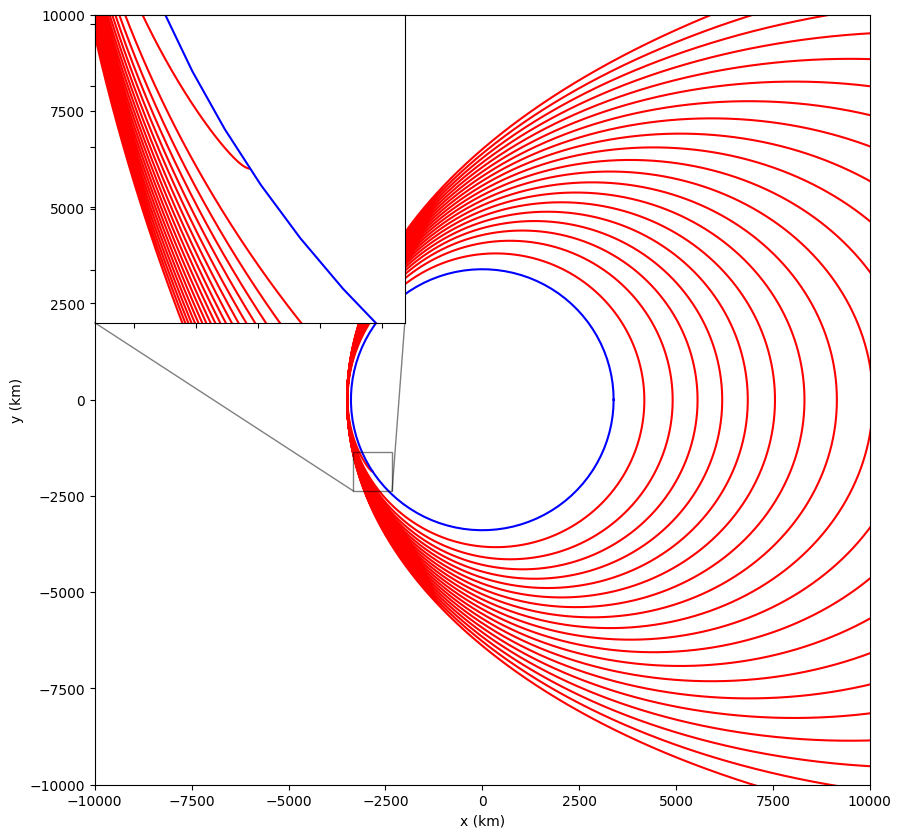

In [65]:

# Initial Conditions
t_final = 3600 * 24 * 8 # determined trajectory time
t_num = t_final # number of steps in trajectory
xyz0 = [r_a*cos(30 * pi / 130), 0, r_a*sin(30 * pi / 130)]  # start position
vxyz0 = [0, v, 0]  # start vertical speed

probe = Probe(probeqns, t_final, t_num, x0=xyz0[0], vx0=vxyz0[0], 
            y0=xyz0[1], vy0=vxyz0[1], z0=xyz0[2], vz0=vxyz0[2], event=mars.radius) # probe as an object
t, posvel = probe.odesolve() # solve the differential equations
t_end = len(t) - 2
altitude = sqrt(posvel[t_end, 0] ** 2 + posvel[t_end, 1] ** 2 + posvel[t_end, 2] ** 2) - mars.radius

# Plotting 2D trajectory in orbit plane
fig = plt.figure(figsize=(10, 10)) # create figure, figsize can be changed as preferred
ax = fig.add_subplot(111)
ax.set_xlim(-10_000, 10_000)
ax.set_ylim(-10_000, 10_000)
ax.plot(posvel[:, 0] /(cos(30 * pi / 130) * 1e3), posvel[:, 1] / 1e3, color='red')

# Plotting Mars
uang = linspace(0, 2 * pi, 100)
x = (mars.radius / 1e3) * cos(uang)
y = (mars.radius / 1e3) * sin(uang)
ax.plot(x, y, color='blue')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')

# inset axes....
window_size = 1_000_000
projected_x = posvel[t_end, 0] / cos(30 * pi / 130)
x1, x2, y1, y2 = projected_x - 1_000_000/2, projected_x + 1_000_000/2, posvel[t_end, 1] - 1_000_000/2, posvel[t_end, 1] + 1_000_000/2  # subregion of the original image
axins = ax.inset_axes(
    [0, 0.6, 0.4, 0.4],
    xlim=(x1 / 1e3, x2 / 1e3), ylim=(y1 / 1e3, y2 / 1e3), xticklabels=[], yticklabels=[])
axins.plot(posvel[:, 0] /(cos(30 * pi / 130) * 1e3), posvel[:, 1] / 1e3, color='red')
axins.plot(x, y, color='blue')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show() # make plot appear

With the above graph we can view the probe colliding with the surface of Mars. To get the semi-major axis and the eccentricity of the last complete orbit we can measure the apoapsis on the graph. 

To be more precise here we are going to take an other approch by detecting the last apoasis and using this value for our final measure.

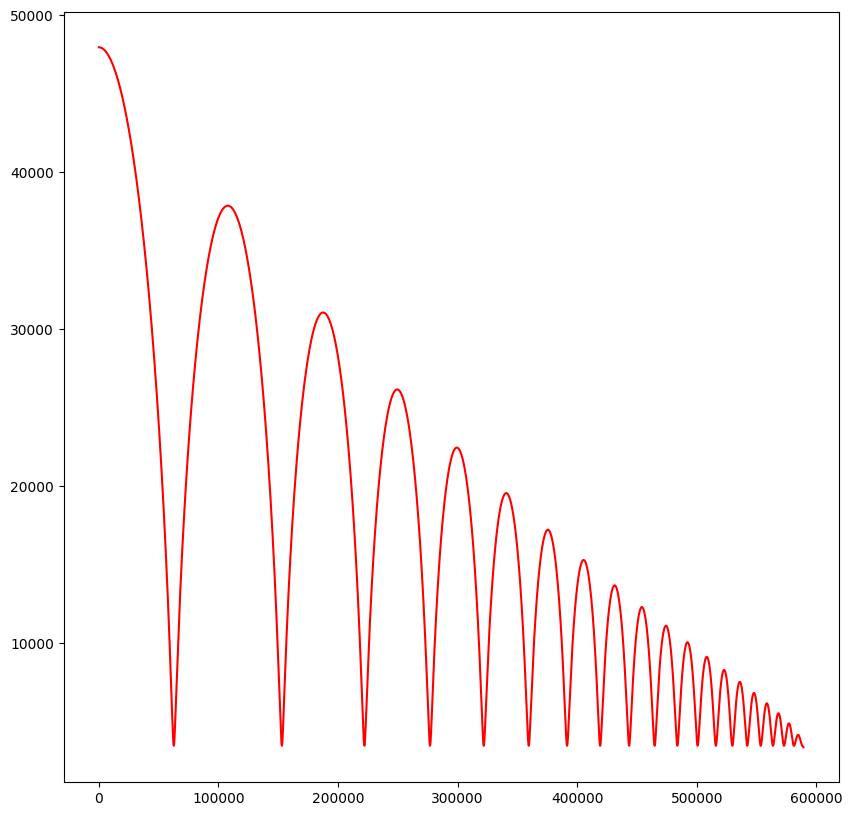

In [66]:
x, y = posvel[:, 0] / cos(30 * pi / 130), posvel[:, 1]
distance = sqrt(x ** 2 + y ** 2)

plt.figure(figsize=(10, 10))
plt.plot(t, distance / 1e3, color='red')
plt.show()

We verify that we are really close to the ground at the end of the simulation to ensure that our results are consistent.

In [67]:
(distance[t_end] - mars.radius) # final altitude in m

139.51565441163257

In [68]:
from scipy.signal import argrelextrema
from numpy import greater

idx = argrelextrema(distance, greater)
apoapsis_of_all_orbits = distance[idx[0]]
last_apoapsis = apoapsis_of_all_orbits[-1]
(last_apoapsis - mars.radius) / 1e3 # apoapsis of the last orbit in km

793.4118939975207

Knowing that the periapsis is still at 100km of altitude we have the following values:

In [69]:
final_rp = 100e3 + mars.radius
final_ra = last_apoapsis

final_a = (final_rp + final_ra) / 2
final_a / 1e3 # semi-major axis in km

3836.2059469987603

In [70]:
e = (final_ra - final_rp) / (final_ra + final_rp)
e # eccentricity

0.09037730293651318

The eccentricity of the final orbit is close to zero as our orbit is way more circular (0 meaning a perfectly circular orbit).